# Różnicowanie

In [8]:
import pandas as pd
import numpy as np
from pandas import read_csv
from datetime import datetime
from pandas import Series
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

Dlaczego różnicujemy szeregi czasowych?

Różnicowanie to metoda przekształcania szeregów czasowych.
Może być użyty do usunięcia zależności czasowych, takie jak trendy i sezonowość.

Różnicowanie odbywa się przez odjęcie poprzedniej obserwacji od obecnej obserwacji.

Różnica (t) = obserwacja (t) - obserwacja (t-1)


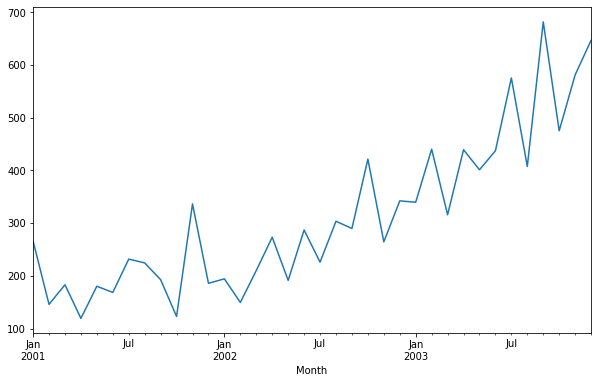

In [2]:
def parser(x):
    return datetime.strptime('200'+x, '%Y-%m')

series = read_csv('data/sales-of-shampoo-over-a-three-ye.csv', 
                  header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

plt.figure(figsize=(10,6))
series.plot()
plt.show()

# Zadanie 1
Wykonaj różnicowanie za pomocą włsnej funkcji.

In [3]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

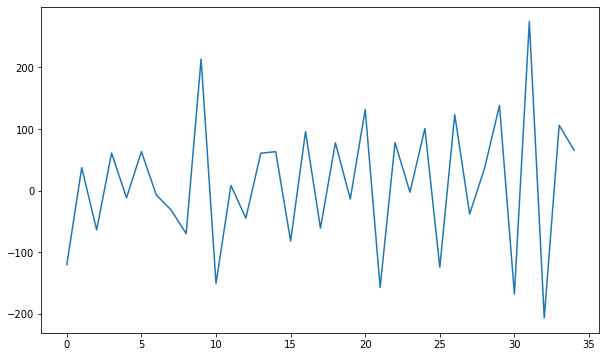

In [4]:
X = series.values
diff = difference(X)

plt.figure(figsize=(10,6));
plt.plot(diff)
plt.show()

# Zadanie 2
Wykonaj różnicowanie za pomocą wbudowanej funkcji <tt>.diff()</tt>.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html

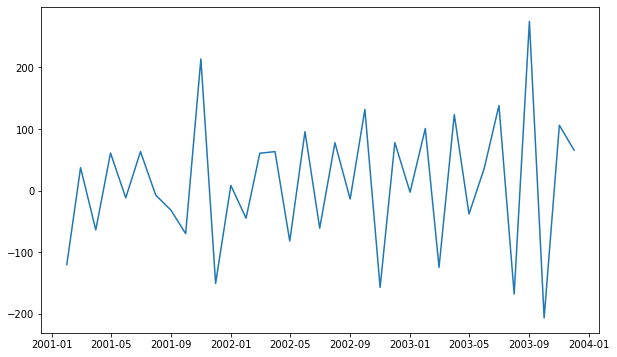

In [5]:
plt.figure(figsize=(10,6))
diff1 = series.diff()
plt.plot(diff1)
plt.show()

In [9]:
dftest = adfuller(diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput) 

Test Statistic                -7.249074e+00
p-value                        1.799857e-10
#Lags Used                     1.000000e+00
Number of Observations Used    3.300000e+01
Critical Value (1%)           -3.646135e+00
Critical Value (5%)           -2.954127e+00
Critical Value (10%)          -2.615968e+00
dtype: float64


# Zadanie 3
Wygeneruj jedną realizację "random walk" i wykonaj różnicowanie oraz sprawdź stacjonarność otrzymanego szeregu czasowego.


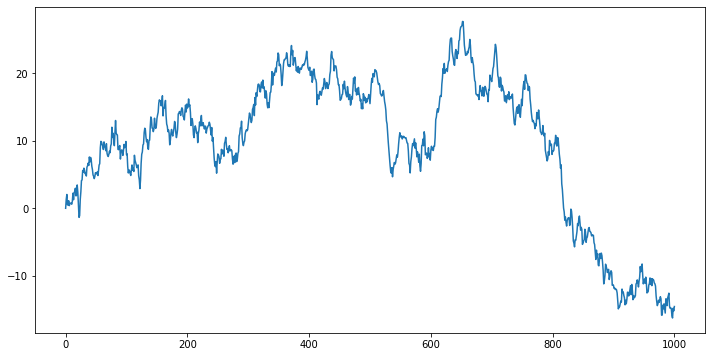

In [10]:
np.random.seed(10)
x = [0]
for j in range(1000):
    x.append(x[j] + np.random.normal())
df=pd.Series(x)
plt.figure(figsize=(12,6))
df.plot()
plt.show() 
x = pd.Series(x)

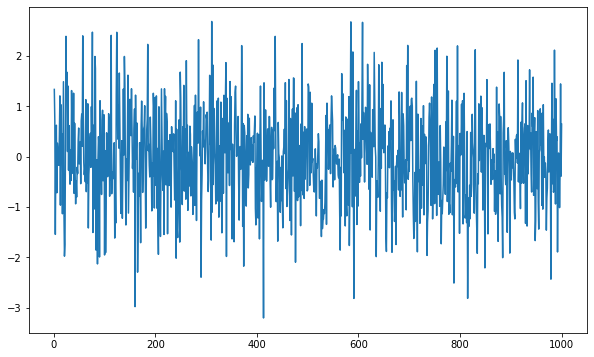

In [11]:
plt.figure(figsize=(10,6))
diff1 = x.diff()
plt.plot(diff1)
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(diff1.dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                 -21.324140
p-value                          0.000000
#Lags Used                       1.000000
Number of Observations Used    998.000000
Critical Value (1%)             -3.436919
Critical Value (5%)             -2.864440
Critical Value (10%)            -2.568314
dtype: float64
